# **Import FILE dari KOMPUTER TYMO**

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics as metrics

In [3]:
# df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
# df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
# df_sample = pd.read_csv(io.StringIO(uploaded['sample_submission.csv'].decode('utf-8')))

In [4]:
df_train = pd.read_csv('train.csv',sep=',')
df_test = pd.read_csv('test.csv',sep=',')
df_sample = pd.read_csv('sample_submission.csv',sep=',')

# **PENJELASAN SOAL KAGGLE**

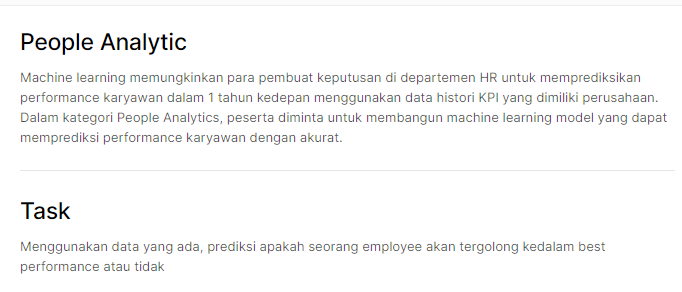

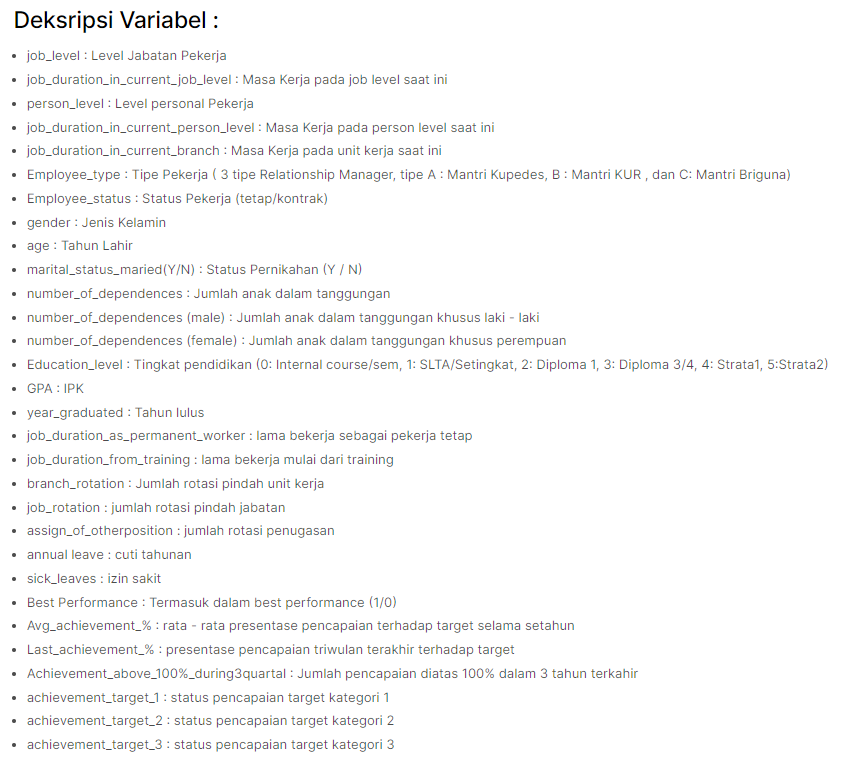

# **Analisa DataFrame**

> **DataFrame Train**



In [5]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


> **DataFrame Test**

In [6]:
df_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.50,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.00,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.50,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.50,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG03,2.75,PG01,2.75,2.75,RM_type_B,Permanent,Male,1987,N,...,1,0,1,0,49.396667,50.71,0.0,achiev_50%-100%,achiev_< 50%,not reached
5996,JG04,1.17,PG03,1.17,0.50,RM_type_B,Permanent,Male,1987,Y,...,3,0,0,0,76.590000,77.70,0.0,achiev_50%-100%,achiev_< 50%,reached
5997,JG04,1.83,PG03,1.83,1.92,RM_type_A,Permanent,Male,1986,Y,...,3,0,3,0,97.906667,111.49,3.0,achiev_100%-150%,achiev_100%-150%,reached
5998,JG04,1.92,PG03,1.92,1.25,RM_type_A,Permanent,Male,1984,Y,...,3,0,1,0,82.833333,81.64,0.0,achiev_100%-150%,achiev_50%-100%,not reached


> **DataFrame untuk SUBMISSION**

In [7]:
df_sample

,index,Best Performance
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
5995,5995,0
5996,5996,0
5997,5997,0
5998,5998,0


In [8]:
df_train.nunique()

job_level                                    4
job_duration_in_current_job_level          102
person_level                                 8
job_duration_in_current_person_level        86
job_duration_in_current_branch              71
Employee_type                                3
Employee_status                              2
gender                                       2
age                                         37
marital_status_maried(Y/N)                   2
number_of_dependences                        7
number_of_dependences (male)                 5
number_of_dependences (female)               5
Education_level                              6
GPA                                        241
year_graduated                              52
job_duration_as_permanent_worker            33
job_duration_from_training                  34
branch_rotation                             20
job_rotation                                15
assign_of_otherposition                     30
annual leave 

# **Mencari Unique Value pada Dtype = Object**

In [9]:
df_train['job_level'].unique()

array(['JG05', 'JG04', 'JG03', 'JG06'], dtype=object)

In [10]:
df_train['person_level'].unique()

array(['PG06', 'PG04', 'PG03', 'PG05', 'PG01', 'PG02', 'PG07', 'PG08'],
      dtype=object)

In [11]:
df_train['Employee_type'].unique()

array(['RM_type_A', 'RM_type_C', 'RM_type_B', nan], dtype=object)

In [12]:
df_train['Employee_status'].unique()

array(['Permanent', 'Contract'], dtype=object)

In [13]:
df_train['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df_train['marital_status_maried(Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [15]:
df_train['Education_level'].unique()

array(['level_4', 'level_5', 'level_3', nan, 'level_1', 'level_2',
       'level_0'], dtype=object)

In [16]:
df_train['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', nan, '2008', '2011', '2010',
       '2013', '2014', '\\N', '1996', '2009', '2005', '2012', '1989',
       '1992', '0', '2000', '1994', '1997', '1993', '1995', '2004',
       '2015', '1986', '1999', '2003', '2016', '2044', '2018', '1991',
       '2002', '2017', '2201', '1998', '1990', '9999', '1984', '2020',
       '1988', '1983', '1985', '201', '2019', '2031', '____', '3016', '-',
       '2200', '102', '2999', '9464'], dtype=object)

In [17]:
df_train['achievement_target_1'].unique()

array(['achiev_50%-100%', 'achiev_100%-150%', 'achiev_< 50%',
       'achiev_> 1.5', nan, 'Tidak diberikan target',
       'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian < 50%',
       'Pencapaian > 1.5'], dtype=object)

In [18]:
df_train['achievement_target_2'].unique()

array(['achiev_< 50%', 'achiev_50%-100%', 'achiev_> 1.5',
       'achiev_100%-150%', nan, 'Tidak diberikan target',
       'Pencapaian 100%-150%', 'Pencapaian < 50%', 'Pencapaian 50%-100%',
       'Pencapaian > 1.5'], dtype=object)

In [19]:
df_train['achievement_target_3'].unique()

array(['reached', 'not_reached', nan, 'not reached'], dtype=object)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

In [21]:
df_train.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


In [70]:
a123=df_train.loc[df_train.GPA >4]
a123[['GPA']]

,GPA
40,7.28
97,48.61
204,45.00
406,45.29
684,32.12
...,...
20170,378.00
20774,13.43
20804,334.00
21611,47.35


In [68]:
a123=df_train.loc[df_train.age >1998]
a123[['age']]

,age
6324,2017


# **DATA CLEANING and REPLACEMENT NA, NaN, Null**

In [22]:
df_train.isna().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

In [23]:
df_test.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Avg_achieve

In [24]:
df_train2=df_train.dropna()
df_train2.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Best Perfor

> **DataFrame Train bersih dari NaN, Na, Null**

In [25]:
df_train2

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
6,JG04,1.75,PG03,1.75,1.33,RM_type_B,Permanent,Female,1986,N,...,0,0,2,1,66.816667,70.43,0.0,achiev_50%-100%,achiev_< 50%,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,JG05,2.67,PG06,0.50,1.50,RM_type_A,Permanent,Female,1965,Y,...,1,0,0,0,85.590000,89.37,1.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
21999,JG04,1.92,PG03,1.92,2.17,RM_type_A,Permanent,Male,1987,Y,...,0,9,2,0,68.230000,76.66,0.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached


Drop sekitar 10278 Data. (22005 menjadi 11727)

# **Pearson Correlation Heat Map**

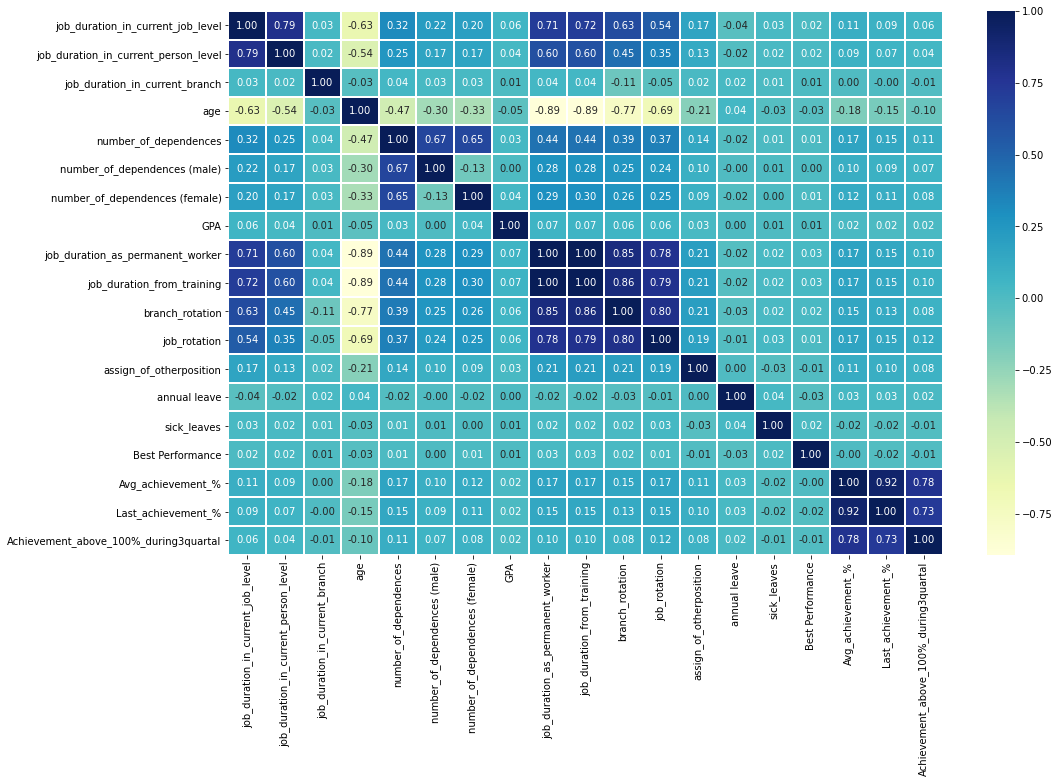

In [26]:
corr = df_train2.corr()
f, ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", linewidths=1, ax=ax, cmap="YlGnBu")

# **Drop variable as Object:**

*   job_level
*   person level
*   Employment_type
*   Employment_status
*   gender
*   marital_status_maried(Y/N)
*   Education_level
*   year_graduated
*   achievement_target_1  
*   achievement_target_2
*   achievement_target_3

# **Drop variable cause similiar:**
*   job_duration_as_permanent_worker
*   List item
*   List item



> **DataFrame Train bersih dari Variable yang tidak perlu**

In [27]:
df_train3=df_train2.drop(['job_level','person_level','Employee_type','Employee_status','gender','marital_status_maried(Y/N)'
                          ,'Education_level','year_graduated','achievement_target_1','achievement_target_2','achievement_target_3','job_duration_as_permanent_worker'],axis=1)
df_train3

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,8.00,8.00,0.50,1964,3,1,2,2.32,30,9,7,0,8,0,0,68.850000,72.53,0.0
1,5.17,2.00,1.25,1979,3,2,1,3.25,16,7,7,9,3,0,0,94.810000,101.13,3.0
2,1.83,1.83,1.50,1980,1,0,1,3.23,15,9,9,0,6,0,0,72.820000,71.30,0.0
3,7.92,4.00,0.17,1984,0,0,0,0.00,8,5,5,0,3,0,0,86.890000,90.09,2.0
6,1.75,1.75,1.33,1986,0,0,0,3.65,6,7,5,0,0,2,1,66.816667,70.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,2.67,0.50,1.50,1965,2,1,1,0.00,26,11,11,1,0,0,0,85.590000,89.37,1.0
21999,1.92,1.92,2.17,1987,0,0,0,3.12,5,2,2,0,9,2,0,68.230000,76.66,0.0
22000,1.50,1.50,3.42,1986,1,0,1,2.84,5,2,2,0,2,0,0,71.776667,75.53,0.0
22002,1.50,1.50,0.00,1983,2,0,2,3.10,7,5,4,0,3,2,0,108.856667,111.65,3.0


> **DataFrame Test bersih dari Variable yang tidak perlu**

In [28]:
df_test2=df_test.drop(['job_level','person_level','Employee_type','Employee_status','gender','marital_status_maried(Y/N)'
                          ,'Education_level','year_graduated','achievement_target_1','achievement_target_2','achievement_target_3','job_duration_as_permanent_worker'],axis=1)
df_test2

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,1.42,1.42,0.50,1983,2,1,1,3.75,14,7,9,1,3,1,79.506667,94.17,1.0
1,1.58,1.58,2.00,1988,0,0,0,3.07,4,2,2,2,4,1,54.283333,42.97,0.0
2,1.83,1.83,1.50,1988,1,0,1,3.23,4,3,2,0,2,0,43.016667,44.28,0.0
3,8.00,5.00,1.50,1973,3,2,1,0.00,22,8,5,11,3,0,74.390000,80.93,0.0
4,1.92,1.92,0.50,1985,1,1,0,3.86,6,6,3,0,3,0,106.376667,109.09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2.75,2.75,2.75,1987,0,0,0,0.00,3,1,1,0,1,0,49.396667,50.71,0.0
5996,1.17,1.17,0.50,1987,1,0,1,3.40,4,3,3,0,0,0,76.590000,77.70,0.0
5997,1.83,1.83,1.92,1986,2,1,1,3.47,7,5,3,0,3,0,97.906667,111.49,3.0
5998,1.92,1.92,1.25,1984,0,0,0,3.22,6,5,3,0,1,0,82.833333,81.64,0.0


# **NORMALIZATION**

> **DataFrame Train sudah Normalisasi**

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])
df_train4= pd.DataFrame(min_max.fit_transform(df_train3[['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch','age','number_of_dependences'
                                                          ,'number_of_dependences (male)','number_of_dependences (female)','GPA','job_duration_from_training','branch_rotation','job_rotation'
                                                          ,'assign_of_otherposition','annual leave','sick_leaves','Best Performance','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal']]),
                        columns=df_train3[['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch','age','number_of_dependences'
                                            ,'number_of_dependences (male)','number_of_dependences (female)','GPA','job_duration_from_training','branch_rotation','job_rotation'
                                            ,'assign_of_otherposition','annual leave','sick_leaves','Best Performance','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal']].columns)
                                              
df_train4


,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,0.914286,1.00000,0.066667,0.018519,0.428571,0.25,0.50,0.006089,0.848485,0.380952,0.428571,0.000000,0.380952,0.000000,0.0,0.521311,0.542509,0.000000
1,0.590857,0.25000,0.166667,0.296296,0.428571,0.50,0.25,0.008530,0.424242,0.285714,0.428571,0.333333,0.142857,0.000000,0.0,0.727873,0.770180,1.000000
2,0.209143,0.22875,0.200000,0.314815,0.142857,0.00,0.25,0.008478,0.393939,0.380952,0.571429,0.000000,0.285714,0.000000,0.0,0.552900,0.532718,0.000000
3,0.905143,0.50000,0.022667,0.388889,0.000000,0.00,0.00,0.000000,0.181818,0.190476,0.285714,0.000000,0.142857,0.000000,0.0,0.664854,0.682296,0.666667
4,0.200000,0.21875,0.177333,0.425926,0.000000,0.00,0.00,0.009580,0.121212,0.285714,0.285714,0.000000,0.000000,0.017391,1.0,0.505132,0.525792,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11722,0.305143,0.06250,0.200000,0.037037,0.285714,0.25,0.25,0.000000,0.727273,0.476190,0.714286,0.037037,0.000000,0.000000,0.0,0.654510,0.676564,0.333333
11723,0.219429,0.24000,0.289333,0.444444,0.000000,0.00,0.00,0.008189,0.090909,0.047619,0.071429,0.000000,0.428571,0.017391,0.0,0.516378,0.575386,0.000000
11724,0.171429,0.18750,0.456000,0.425926,0.142857,0.00,0.25,0.007454,0.090909,0.047619,0.071429,0.000000,0.095238,0.000000,0.0,0.544599,0.566391,0.000000
11725,0.171429,0.18750,0.000000,0.370370,0.285714,0.00,0.50,0.008136,0.151515,0.190476,0.214286,0.000000,0.142857,0.017391,0.0,0.839641,0.853925,1.000000


# **PEMBAGIAN TARGET DAN VARIABLE BEBAS**

> **DataFrame Train X**

In [30]:
x00 = df_train4.copy(deep=True)
x0 = x00.drop(['Best Performance'],axis =1).reset_index()
x =x0.drop(['index'],axis=1)
x

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,0.914286,1.00000,0.066667,0.018519,0.428571,0.25,0.50,0.006089,0.848485,0.380952,0.428571,0.000000,0.380952,0.000000,0.521311,0.542509,0.000000
1,0.590857,0.25000,0.166667,0.296296,0.428571,0.50,0.25,0.008530,0.424242,0.285714,0.428571,0.333333,0.142857,0.000000,0.727873,0.770180,1.000000
2,0.209143,0.22875,0.200000,0.314815,0.142857,0.00,0.25,0.008478,0.393939,0.380952,0.571429,0.000000,0.285714,0.000000,0.552900,0.532718,0.000000
3,0.905143,0.50000,0.022667,0.388889,0.000000,0.00,0.00,0.000000,0.181818,0.190476,0.285714,0.000000,0.142857,0.000000,0.664854,0.682296,0.666667
4,0.200000,0.21875,0.177333,0.425926,0.000000,0.00,0.00,0.009580,0.121212,0.285714,0.285714,0.000000,0.000000,0.017391,0.505132,0.525792,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11722,0.305143,0.06250,0.200000,0.037037,0.285714,0.25,0.25,0.000000,0.727273,0.476190,0.714286,0.037037,0.000000,0.000000,0.654510,0.676564,0.333333
11723,0.219429,0.24000,0.289333,0.444444,0.000000,0.00,0.00,0.008189,0.090909,0.047619,0.071429,0.000000,0.428571,0.017391,0.516378,0.575386,0.000000
11724,0.171429,0.18750,0.456000,0.425926,0.142857,0.00,0.25,0.007454,0.090909,0.047619,0.071429,0.000000,0.095238,0.000000,0.544599,0.566391,0.000000
11725,0.171429,0.18750,0.000000,0.370370,0.285714,0.00,0.50,0.008136,0.151515,0.190476,0.214286,0.000000,0.142857,0.017391,0.839641,0.853925,1.000000


> **DataFrame Train Y**

In [31]:
y0=df_train4[['Best Performance']].reset_index()
y=y0.drop(['index'],axis=1)
y

,Best Performance
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
11722,0.0
11723,0.0
11724,0.0
11725,0.0


# **APPLY MACHINE LEARNING**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=500)

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
ran2 = RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,min_samples_split=6,min_samples_leaf=6,max_features='auto',oob_score=True,random_state=42,n_jobs=-1,verbose=1)
knn = KNeighborsClassifier(n_neighbors=100)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
naive = GaussianNB()
xgb = XGBClassifier()

In [34]:
models = {"Decision tree" : dec,
          "Random forest" : ran,
          "Random forest Tuning" : ran2,
          "KNN" : knn,
          "SGD" : sgd,
          "Naive bayes" : naive,
          "XGBoost" : xgb}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test,y_test)

<ipython-input-34-98bb22f99bfb>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-34-98bb22f99bfb>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(

In [35]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest Tuning,0.849105
KNN,0.849105
SGD,0.849105
Random forest,0.848679
XGBoost,0.843564
Naive bayes,0.792839
Decision tree,0.735294


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Random forest Tuning'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SGD'),
  Text(3, 0, 'Random forest'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'Naive bayes'),
  Text(6, 0, 'Decision tree')])

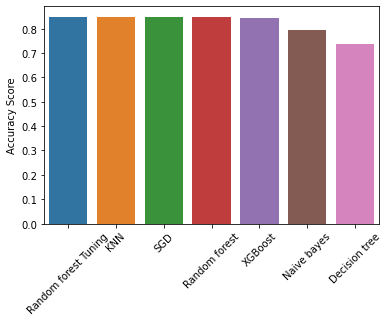

In [36]:
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)

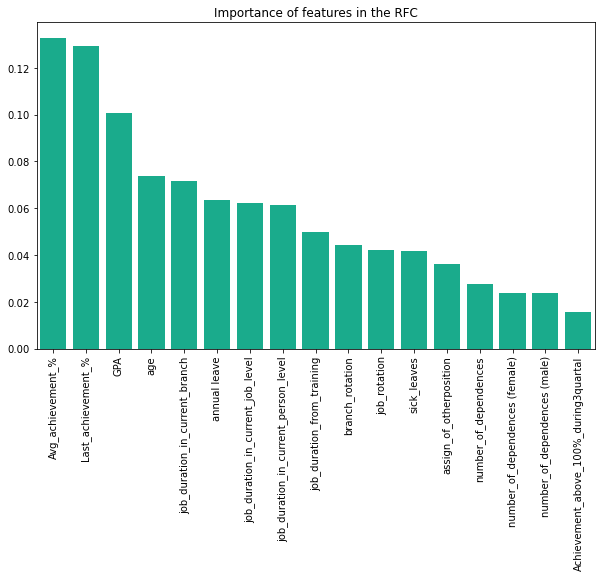

In [37]:
rfc = RandomForestClassifier()
rfc.fit(df_train4.drop(['Best Performance'], axis= 1), df_train4['Best Performance'])

# Discovering the importance of features in the model
tmp = pd.DataFrame({'Columns': df_train4.drop(['Best Performance'], axis= 1).columns,
                    'Importance': rfc.feature_importances_})
tmp = tmp.sort_values(by = 'Importance', ascending = False)

# Plotting a graph about it
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(data = tmp,
             x = 'Columns',
             y = 'Importance',
           color = '#02c39a')
plt.title('Importance of features in the RFC')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')

plt.show()

In [38]:
y_pred_train=xgb.predict(x_train)
y_pred_test=xgb.predict(x_test)

In [39]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.9126958746402303
Testing accuracy:  0.8435635123614663


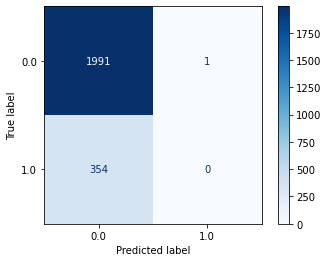

In [40]:
from sklearn.metrics import plot_confusion_matrix
 
disp = plot_confusion_matrix(ran, x_test, y_test,cmap=plt.cm.Blues)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test, target_names=target_names))
print("micro avg =",precision_recall_fscore_support(y_test, y_pred_test, average='micro'))

              precision    recall  f1-score   support

     class 0       0.85      0.99      0.91      1992
     class 1       0.32      0.03      0.06       354

    accuracy                           0.84      2346
   macro avg       0.59      0.51      0.49      2346
weighted avg       0.77      0.84      0.79      2346

micro avg = (0.8435635123614663, 0.8435635123614663, 0.8435635123614663, None)


In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.5106740521407663

In [43]:
xgb.fit(x_train, y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

bla= accuracy_score(y_test,y_pred_test)
bla

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8435635123614663

# **FILE SUBMISSION**

In [44]:
hasil0 = df_test2.copy(deep=True)
# hasil = hasil0.drop(['Best_Performance'],axis =1)
hasil = hasil0.reset_index()
hasil

,index,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,0,1.42,1.42,0.50,1983,2,1,1,3.75,14,7,9,1,3,1,79.506667,94.17,1.0
1,1,1.58,1.58,2.00,1988,0,0,0,3.07,4,2,2,2,4,1,54.283333,42.97,0.0
2,2,1.83,1.83,1.50,1988,1,0,1,3.23,4,3,2,0,2,0,43.016667,44.28,0.0
3,3,8.00,5.00,1.50,1973,3,2,1,0.00,22,8,5,11,3,0,74.390000,80.93,0.0
4,4,1.92,1.92,0.50,1985,1,1,0,3.86,6,6,3,0,3,0,106.376667,109.09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,2.75,2.75,2.75,1987,0,0,0,0.00,3,1,1,0,1,0,49.396667,50.71,0.0
5996,5996,1.17,1.17,0.50,1987,1,0,1,3.40,4,3,3,0,0,0,76.590000,77.70,0.0
5997,5997,1.83,1.83,1.92,1986,2,1,1,3.47,7,5,3,0,3,0,97.906667,111.49,3.0
5998,5998,1.92,1.92,1.25,1984,0,0,0,3.22,6,5,3,0,1,0,82.833333,81.64,0.0


In [45]:
preds = xgb.predict(hasil0)
preds

array([1., 0., 1., ..., 1., 0., 0.])

In [46]:
print(len(preds))

6000


In [47]:
df_result = pd.DataFrame({'index':hasil['index'] ,'Best Performance' : preds})
df_result

,index,Best Performance
0,0,1.0
1,1,0.0
2,2,1.0
3,3,1.0
4,4,0.0
...,...,...
5995,5995,0.0
5996,5996,1.0
5997,5997,1.0
5998,5998,0.0


In [48]:
df_result.to_csv('DataRookies_Submission_pa.csv', index=False)